# A Study of Suicide Rates
By Michelle Thorne

## Introduction:
Suicides represent a major public mental health problem. There can be many different factors that could influence a person’s decision to commit suicide including stress, abuse, severe depression, social isolation, mental illness such as schizophrenia or by polar disorder, etc. I hypothesize that suicide rates are higher in more developed countires. There is more stress and pressure to work, produce, and be successful in more developed countries with booming economies. As countries’ economies have become bigger and more globalized, there is even more pressure as it's more difficult to compete in the global market. I believe there is a link between a prosperous country and suicide rates. 

## Hypotheses:
Hypothesis 1:  

*   Ho1: Total suicides have not increased world wide from 1985 to 2015.
*   Ha1: Total suicides have increased from 1985 to 2015.

Hypothesis 2:

*   Ho2:The suicide rates of teenagers in 1990 is not significantly different than suicide rates of teenagers in 2010.
*   Ha2:The suicide rates of teenagers in 1990 is significantly different than suicide rates of teenagers in 2010.

Hypothesis 3:

*   Ho3:There is no correlation between suicide rates of 2015 and GDP or GDP per capita
*   Ha3:There is a correlation between suicide rates of 2015 and GDP or GDP per capita

Hypothesis 4: If Hypothesis 1 is true:

*   Ho4: Suicide rates are not significantly different on different continents.
*   Ha4: Suicide rates are significantly different on different continents.






 

## The Data:
The data comes from Kaggle and contains 27,821 observations with 12 different variables. There are missing or null values in the HDI for year column but this is not a problem because I will not be using that for my analysis.

In [ ]:
#import the proper libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
#build the data frame
suicide_frame = pd.read_csv('https://raw.githubusercontent.com/tiagofassoni/some_resources/master/suicide-rates-overview-1985-to-2016.csv')
suicide_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#lets drop 2016 because most countries do not have this year recorded
suicide_frame_clean=suicide_frame[suicide_frame['year'] != 2016]
#lets also drop some columns we won't be using
suicide_frame_clean = suicide_frame_clean.drop(['HDI for year', 'generation'], axis = 1)
suicide_frame_clean.info()
suicide_frame_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8    gdp_for_year ($)   27660 non-null  object 
 9   gdp_per_capita ($)  27660 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796


## Hypothesis 1: 
Ho1: Total suicides have not increased world wide from 1985 to 2015.

Ha1: Total suicides have increased from 1985 to 2015.

Method: I first compared the total number of suicides reported in 1985 with 2015. I did see that there was in increase, so then I wanted a total number of suicides reported per year and then plotted it on a scatterplot to get an overal trend from 1985 to 2015.

In [ ]:
#lets just look at the years 1985 and 2015 for now.
no_of_suicides_1985 = suicide_frame_clean[suicide_frame_clean['year'] == 1985]
print(no_of_suicides_1985.info())
no_of_suicides_2015 = suicide_frame_clean[suicide_frame_clean['year'] == 2015]
print(no_of_suicides_2015.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 264 to 27231
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             576 non-null    object 
 1   year                576 non-null    int64  
 2   sex                 576 non-null    object 
 3   age                 576 non-null    object 
 4   suicides_no         576 non-null    int64  
 5   population          576 non-null    int64  
 6   suicides/100k pop   576 non-null    float64
 7   country-year        576 non-null    object 
 8    gdp_for_year ($)   576 non-null    object 
 9   gdp_per_capita ($)  576 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 49.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             744

In [ ]:
total_1985 = sum(no_of_suicides_1985['suicides_no'])
print(total_1985)
total_2015 = sum(no_of_suicides_2015['suicides_no'])
print(total_2015)

#this confirms that there was an increase in suicides reported in 2015
#versus 30 years prior. It is nearly double.

116063
203640


In [ ]:
#Lets see if we can get a total number of records per year
total_records_per_year = suicide_frame_clean['year'].value_counts()
print(total_records_per_year)

#this indicates an incomplete data set. Not every country has records from every year. 
#This could be due to many factors. Maybe a country didn't exist in certain
#years like Bosnia and Herzegovina for example. Or they had political unrest and
#where not able to record such information.

2009    1068
2010    1056
2001    1056
2011    1032
2003    1032
2002    1032
2007    1032
2000    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
Name: year, dtype: int64


In [ ]:
#Let's get a total number of suicides recorded world wide per year.
years = suicide_frame_clean['year'].unique()
years.sort()
#print(years)  get a list of all the years chronologically

no_of_suicides = [] #create an empty list

#build a list of the total number of suicides for each year
for year in years:
  no_of_suicides_for_year = suicide_frame_clean[suicide_frame_clean['year'] == year]
  total_suicides = sum(no_of_suicides_for_year['suicides_no'])
  no_of_suicides.append(total_suicides)

#put the two lists together in a series
no_of_suicides_per_year = pd.Series(data=no_of_suicides, index=years)
no_of_suicides_per_year 


1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
dtype: int64

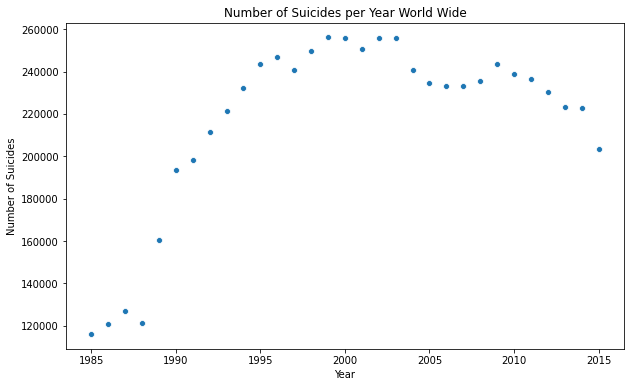

In [ ]:
#now lets plot it!!
plt.figure(figsize = (10,6))
suicides_per_year_plot = sns.scatterplot(data=no_of_suicides_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title("Number of Suicides per Year World Wide")

plt.show()

#below shows the trend of the total number of suicides per year world wide

### Results of Hypothesis 1:

This confirms the first hypothesis that total suicides have increased world wide from 1985 to 2015. Althought the peak shows it to be in the early to mid 2000's. It is currently on a downward trend but there are still more suicides reported in 2015 than in 1985.

## Hypothesis 2:
Ho2:The suicide rates of teenagers in 1990 is not significantly different than suicide rates of teenagers in 2010.

Ha2:The suicide rates of teenagers in 1990 is significantly different than suicide rates of teenagers in 2010.

Method: I retrieved the data for the age range of 15-24 years for both 1990 and 2010, plotted a histogram, checked the descriptive stats on each sample group and ran a Shapiro-Wilks test to determine normality. The data was determined to be not normally distributed so I ran a Kruskal Wallis test to determine if there was a significant difference between the two sample groups.

In [ ]:
#Hypothesis 2: Lets look at the suicide rate per 100k pop for the age range 15-24
teens_1990 =suicide_frame_clean[suicide_frame_clean['age']=='15-24 years'][suicide_frame_clean['year']==1990]
teens_1990.info()
teens_2010 = suicide_frame_clean[suicide_frame_clean['age']=='15-24 years'][suicide_frame_clean['year']==2010]
teens_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 325 to 27564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             128 non-null    object 
 1   year                128 non-null    int64  
 2   sex                 128 non-null    object 
 3   age                 128 non-null    object 
 4   suicides_no         128 non-null    int64  
 5   population          128 non-null    int64  
 6   suicides/100k pop   128 non-null    float64
 7   country-year        128 non-null    object 
 8    gdp_for_year ($)   128 non-null    object 
 9   gdp_per_capita ($)  128 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 11.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 256 to 27764
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             176 non-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


DescribeResult(nobs=128, minmax=(0.0, 50.89), mean=9.115156249999998, variance=84.53540312500002, skewness=1.8964333177534842, kurtosis=4.615414658680549)
DescribeResult(nobs=176, minmax=(0.0, 40.82), mean=7.973750000000001, variance=76.37093557142856, skewness=1.7481297708036412, kurtosis=2.8847404261322662)
(0.8171765804290771, 2.5256239807869285e-11)
(0.8001545071601868, 3.023125302067768e-14)


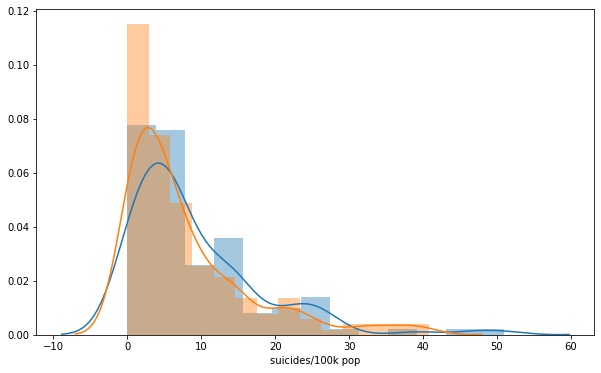

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(teens_1990['suicides/100k pop'])
sns.distplot(teens_2010['suicides/100k pop'])

print(stats.describe(teens_1990['suicides/100k pop']))
print(stats.describe(teens_2010['suicides/100k pop']))

print(stats.shapiro(teens_1990['suicides/100k pop']))
print(stats.shapiro(teens_2010['suicides/100k pop']))

#visually this is not normally distributed The skewness and 
#kurtosis are not close to zero. The results of the Shapiro-Wilk's
#test indicate that these are not normally distributed.

In [ ]:
#Since the data sets are not normally distributed, lets run a 
#Kuskal-Wallis test to see if they are significantly different from one another.
stats.kruskal(teens_1990['suicides/100k pop'], teens_2010['suicides/100k pop'])


KruskalResult(statistic=2.4683136176426177, pvalue=0.11616249680017487)

### Results of Hypothesis 2 and Further Investigation

With a very small H value and a p value over 0.05 we cannot reject the null that the suicide rate for teens in 2010 is higher than in the 1990s.

This is an interesting result since in the previous analysis, we saw that the total number of suicides have increased with the peak being in the early to mid 2000s. But the rate at which suicides are happening, at least for 15-24 year olds has not significantly changed. This could be that the rate at which population is increasing is the same or similar to suicide rate. 

In [ ]:
#get a dataset of just teens from 1990 to 2010

teen_population = suicide_frame_clean[suicide_frame_clean['age'] == '15-24 years'][suicide_frame_clean['year']>=1990 ]
teen_population = teen_population[teen_population['year']<=2010]
teen_population.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($)
27741,Uzbekistan,2005,female,15-24 years,114,2846661,4.00,Uzbekistan2005,"14,307,509,839",606
27751,Uzbekistan,2009,male,15-24 years,242,3176656,7.62,Uzbekistan2009,"33,689,223,673",1332
27752,Uzbekistan,2009,female,15-24 years,186,3079271,6.04,Uzbekistan2009,"33,689,223,673",1332
27763,Uzbekistan,2010,male,15-24 years,246,3208299,7.67,Uzbekistan2010,"39,332,770,929",1533
27764,Uzbekistan,2010,female,15-24 years,208,3098743,6.71,Uzbekistan2010,"39,332,770,929",1533


year
1990    262224981
1991    263683586
1992    278729125
1993    267069051
1994    267468800
Name: population, dtype: int64


Text(0.5, 1.0, 'Population of Teens Per Year World Wide')

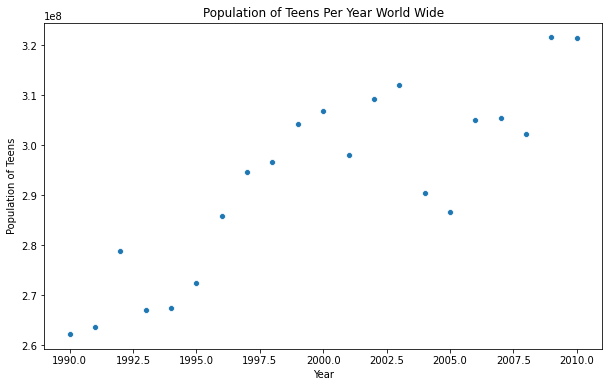

In [ ]:
#plot the population trend of teens from 1990 to 2010
total_teen_population = teen_population.groupby('year')['population'].sum()
print(total_teen_population.head())
plt.figure(figsize = (10,6))
pop_plot = sns.scatterplot(data=total_teen_population)
plt.xlabel('Year')
plt.ylabel('Population of Teens')
plt.title("Population of Teens Per Year World Wide")

year
1990    23248
1991    23317
1992    24727
1993    25262
1994    27296
Name: suicides_no, dtype: int64


Text(0.5, 1.0, 'Number of Teen Suicides per Year World Wide')

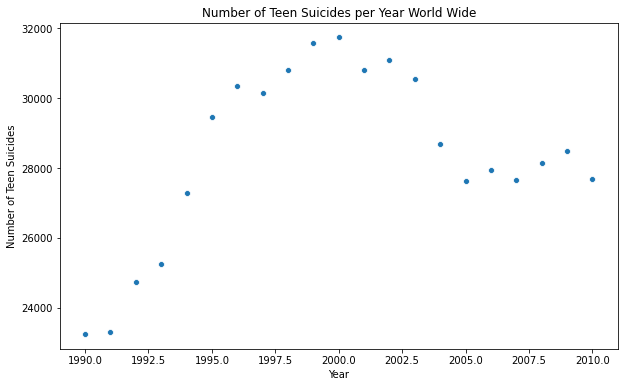

In [ ]:
#plot the total number of suicides of teens from 1990 to 2010
total_teen_suicides = teen_population.groupby('year')['suicides_no'].sum()
print(total_teen_suicides.head())
plt.figure(figsize=(10,6))
suicide_plot = sns.scatterplot(data=total_teen_suicides)
plt.xlabel('Year')
plt.ylabel('Number of Teen Suicides')
plt.title("Number of Teen Suicides per Year World Wide")

Text(0.5, 1.0, 'Teen Suicide Rate per Year World Wide')

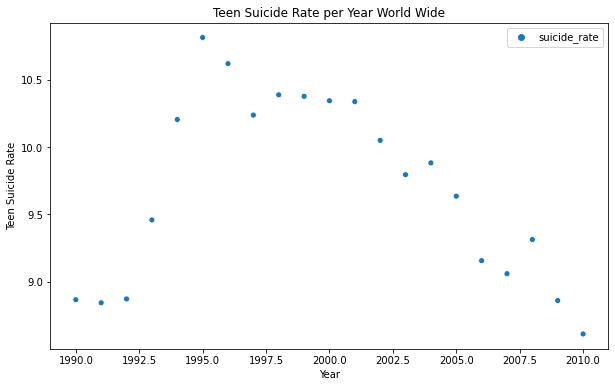

In [ ]:
#plot the suicide rate of teens from 1990 to 2010
teen_suicides_rate = pd.merge(total_teen_suicides, total_teen_population, on='year')
teen_suicides_rate = teen_suicides_rate.assign(suicide_rate = (teen_suicides_rate.suicides_no/teen_suicides_rate.population)*100000)
teen_suicides_rate = teen_suicides_rate.drop(['suicides_no', 'population'], axis = 1)
teen_suicides_rate.head()
plt.figure(figsize=(10,6))
suicide_rate_plot = sns.scatterplot(data=teen_suicides_rate)
plt.xlabel('Year')
plt.ylabel('Teen Suicide Rate')
plt.title("Teen Suicide Rate per Year World Wide")

This plot shows that there was an increase in the 90's but a decrease in the 2000s. So the overall rate between the year 1990 and the year 2010 were roughly the same. This supports the above findings that the rates were not significantly different.

Below shows the same analysis for determining if the suicide rate was significantly different for the year 1990 and for the year 2010 for the different age ranges. The results were all the same in that they was no significant difference between the two sample groups.

DescribeResult(nobs=128, minmax=(0.0, 64.14), mean=12.358828125, variance=157.56702774975395, skewness=1.518062549038689, kurtosis=2.233158075325198)
DescribeResult(nobs=176, minmax=(0.0, 61.67), mean=10.830852272727272, variance=161.1111701266234, skewness=1.8950972389201348, kurtosis=3.6571480348348198)
(0.8345997333526611, 1.117490891489048e-10)
(0.7786919474601746, 4.960494719114883e-15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


KruskalResult(statistic=2.728307748126754, pvalue=0.09858369266631292)

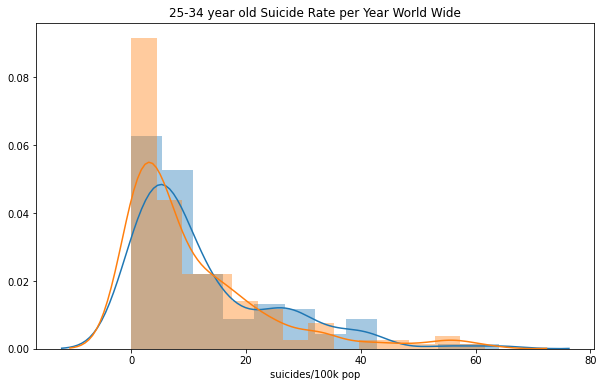

In [ ]:
mid20s_1990 =suicide_frame_clean[suicide_frame_clean['age']=='25-34 years'][suicide_frame_clean['year']==1990]
mid20s_2010 = suicide_frame_clean[suicide_frame_clean['age']== '25-34 years'][suicide_frame_clean['year']==2010]

plt.figure(figsize = (10,6))
sns.distplot(mid20s_1990['suicides/100k pop'])
sns.distplot(mid20s_2010['suicides/100k pop'])
plt.title("25-34 year old Suicide Rate per Year World Wide")

print(stats.describe(mid20s_1990['suicides/100k pop']))
print(stats.describe(mid20s_2010['suicides/100k pop']))

print(stats.shapiro(mid20s_1990['suicides/100k pop']))
print(stats.shapiro(mid20s_2010['suicides/100k pop']))

stats.kruskal(mid20s_1990['suicides/100k pop'], mid20s_2010['suicides/100k pop'])

#same result

DescribeResult(nobs=128, minmax=(0.0, 67.68), mean=13.975234375, variance=193.44623931471455, skewness=1.7494705576767755, kurtosis=3.339132444927623)
DescribeResult(nobs=176, minmax=(0.0, 89.74), mean=13.626647727272728, variance=246.81423612662343, skewness=2.0548144429223534, kurtosis=5.07925707814784)
(0.8244963884353638, 4.6610167114824463e-11)
(0.7757584452629089, 3.912962720498386e-15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


KruskalResult(statistic=1.1141689127160392, pvalue=0.29117751153157295)

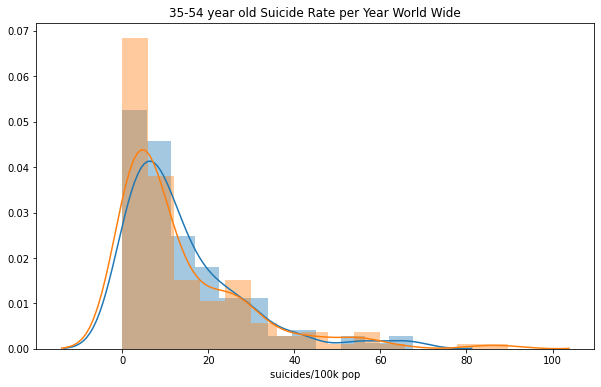

In [ ]:
mid_life_1990 =suicide_frame_clean[suicide_frame_clean['age']=='35-54 years'][suicide_frame_clean['year']==1990]
mid_life_2010 = suicide_frame_clean[suicide_frame_clean['age']== '35-54 years'][suicide_frame_clean['year']==2010]

plt.figure(figsize = (10,6))
sns.distplot(mid_life_1990['suicides/100k pop'])
sns.distplot(mid_life_2010['suicides/100k pop'])
plt.title("35-54 year old Suicide Rate per Year World Wide")

print(stats.describe(mid_life_1990['suicides/100k pop']))
print(stats.describe(mid_life_2010['suicides/100k pop']))

print(stats.shapiro(mid_life_1990['suicides/100k pop']))
print(stats.shapiro(mid_life_2010['suicides/100k pop']))

stats.kruskal(mid_life_1990['suicides/100k pop'], mid_life_2010['suicides/100k pop'])

#same result

### Even Further Investigation:

We have shown that there is no significant difference from 1990 to 2010 for any of the age ranges. Are the age ranges themselves significantly different?


In [ ]:
stats.kruskal(mid_life_1990['suicides/100k pop'], teens_1990['suicides/100k pop'], mid20s_1990['suicides/100k pop'])

KruskalResult(statistic=8.865237575847203, pvalue=0.011883328970562473)

In [ ]:
stats.kruskal(mid_life_2010['suicides/100k pop'], teens_2010['suicides/100k pop'], mid20s_2010['suicides/100k pop'])

KruskalResult(statistic=11.616889212502059, pvalue=0.003002095883969785)

This test shows that there IS a significant difference between the age ranges for a given year, more so in 2010 than 1990. What about gender?


Text(0.5, 1.0, 'Suicide Rate by Gender per Year World Wide')

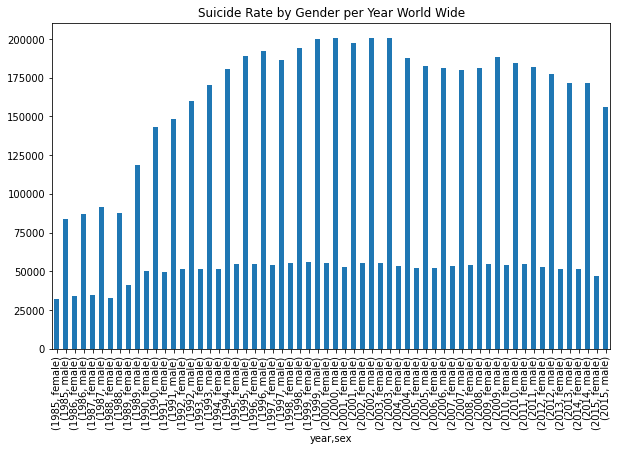

In [ ]:
by_gender = suicide_frame_clean.groupby(['year', 'sex'])['suicides_no'].sum().plot(kind='bar', figsize=(10,6))
plt.title("Suicide Rate by Gender per Year World Wide")

This graph clearly shows that males are much more likely to commit suicide than females.

## Hypothesis 3:
Ho3:There is no correlation between suicide rates of 2015 and GDP or GDP per capita

Ha3:There is a correlation between suicide rates of 2015 and GDP or GDP per capita

Method: I  needed to get the overall suicide rate and GDP as well as GDP per capita per country for the year 2015. The original data was divided by age group and gender. Using the groupby() method, I was able to get a sum per country for population and number of suicides. I used that to calculate the suicide rate per country. I also used the groupby() method to get the GDP per year and using total population, I got a GDP per capita and then merged all this information together into a new database called suicides_2015_modified. I ran a correlation test on both suicide rate vs. GDP and suicide rate vs. GDP per capita and found no strong correlation between either of them.

In [ ]:
#we need to manipulate the dataframe to get overall suicide rate and GDP and GDP per capita for
suicides_2015 = suicide_frame_clean[suicide_frame_clean['year'] == 2015]
suicides_2015.info()
#drop rows we don't need
suicides_2015 = suicides_2015.drop(['year', 'age', 'sex', 'suicides/100k pop', 'country-year'], axis = 1)
suicides_2015.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             744 non-null    object 
 1   year                744 non-null    int64  
 2   sex                 744 non-null    object 
 3   age                 744 non-null    object 
 4   suicides_no         744 non-null    int64  
 5   population          744 non-null    int64  
 6   suicides/100k pop   744 non-null    float64
 7   country-year        744 non-null    object 
 8    gdp_for_year ($)   744 non-null    object 
 9   gdp_per_capita ($)  744 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 63.9+ KB


,country,suicides_no,population,gdp_for_year ($),gdp_per_capita ($)
576,Antigua and Barbuda,1,6403,"1,364,863,037",14853
577,Antigua and Barbuda,0,8561,"1,364,863,037",14853
578,Antigua and Barbuda,0,7740,"1,364,863,037",14853
579,Antigua and Barbuda,0,15323,"1,364,863,037",14853
580,Antigua and Barbuda,0,8239,"1,364,863,037",14853
581,Antigua and Barbuda,0,1724,"1,364,863,037",14853
582,Antigua and Barbuda,0,8331,"1,364,863,037",14853
583,Antigua and Barbuda,0,7059,"1,364,863,037",14853
584,Antigua and Barbuda,0,13370,"1,364,863,037",14853
585,Antigua and Barbuda,0,8268,"1,364,863,037",14853


In [ ]:
suicide_no_2015 = suicides_2015.groupby('country')['suicides_no'].sum()
print(suicide_no_2015.head()) #get total suicides per country
population_2015 = suicides_2015.groupby('country')['population'].sum()
print(population_2015.head()) #get total population per country


country
Antigua and Barbuda       1
Argentina              3073
Armenia                  74
Australia              3027
Austria                1251
Name: suicides_no, dtype: int64
country
Antigua and Barbuda       91889
Argentina              39699624
Armenia                 2795335
Australia              22240785
Austria                 8219386
Name: population, dtype: int64


In [ ]:
#get the GDP per country
gdps = suicides_2015.groupby('country')[' gdp_for_year ($) '].max()
gdps_numeric = gdps.apply(lambda x: x.replace(",",""))
gdps_numeric_new=pd.to_numeric(gdps_numeric)
print(gdps_numeric_new.head())

country
Antigua and Barbuda       1364863037
Argentina               594749285413
Armenia                  10553337673
Australia              1349034029453
Austria                 382065930308
Name:  gdp_for_year ($) , dtype: int64


In [ ]:

#build modified data frame
suicides_2015_modified = pd.merge( suicide_no_2015, population_2015, on='country')
suicides_2015_modified = suicides_2015_modified.assign(suicide_rate = (suicides_2015_modified.suicides_no/suicides_2015_modified.population)*100000)
suicides_2015_modified = pd.merge(suicides_2015_modified, gdps_numeric_new, on='country')
suicides_2015_modified=suicides_2015_modified.rename(columns={' gdp_for_year ($) ':'GDP'})
suicides_2015_modified = suicides_2015_modified.assign(GDP_per_capita = (suicides_2015_modified.GDP/suicides_2015_modified.population))
print(suicides_2015_modified.head(10))


                     suicides_no  population  ...            GDP  GDP_per_capita
country                                       ...                               
Antigua and Barbuda            1       91889  ...     1364863037    14853.388730
Argentina                   3073    39699624  ...   594749285413    14981.232200
Armenia                       74     2795335  ...    10553337673     3775.339154
Australia                   3027    22240785  ...  1349034029453    60655.863966
Austria                     1251     8219386  ...   382065930308    46483.512310
Belgium                     1867    10624356  ...   455039563133    42829.848993
Belize                        26      319835  ...     1778567600     5560.891084
Brazil                     11163   191087085  ...  1802214373741     9431.377185
Chile                       1838    16565725  ...   243999477738    14729.175918
Colombia                    2332    44490427  ...   291519591533     6552.411635

[10 rows x 5 columns]


The correlation coefficient between suicide rate and GDP is (0.11474669571988941, 0.37450461034847354)


Text(0.5, 1.0, 'GDP versus Suicide Rate')

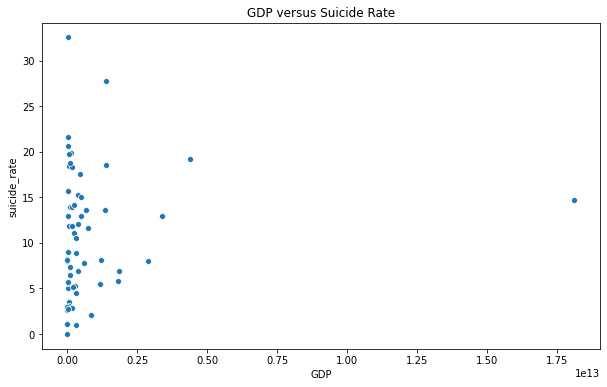

In [ ]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP = stats.pearsonr(suicides_2015_modified['suicide_rate'], suicides_2015_modified['GDP'])
print("The correlation coefficient between suicide rate and GDP is {}".format(pearsonr_GDP))
plt.figure(figsize = (10,6))
GDP_plot = sns.scatterplot(x="GDP", y="suicide_rate", data=suicides_2015_modified)
plt.title("GDP versus Suicide Rate")


The correlation coefficient between suicide rate and GDP per capita is (0.1292433351823483, 0.3167497694689751)


Text(0.5, 1.0, 'GDP per Capita versus Suicide Rate')

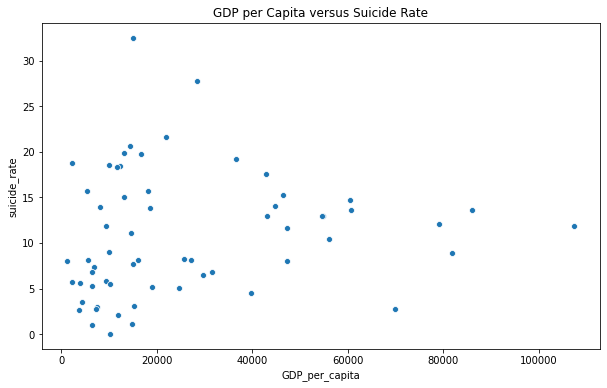

In [ ]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP_per_capita = stats.pearsonr(suicides_2015_modified['suicide_rate'], suicides_2015_modified['GDP_per_capita'])
print("The correlation coefficient between suicide rate and GDP per capita is {}".format(pearsonr_GDP_per_capita))
plt.figure(figsize = (10,6))
GDP_plot = sns.scatterplot(x="GDP_per_capita", y="suicide_rate", data=suicides_2015_modified)
plt.title("GDP per Capita versus Suicide Rate")

## Results for Hypothesis 3:
According to the coefficients and the p-values there is a very small to no correlation between GDP or GDP per capita and suicide rates. This is even seen clearly in the scatter plots so we can not reject the null that there is a correlation between the two columns. For further investigation, below I found the outliers on each axis. The maximum suicide rate turned out to be Lithuania and the maximum GDP per capita was Luxembourg.

In [ ]:
suicides_2015_modified.sort_values('suicide_rate', ascending=False).head(20)
#Lithuania has the highest suicide rate of any country with South Korea second. 

,suicides_no,population,suicide_rate,GDP,GDP_per_capita
country,,,,,
Lithuania,896,2753926,32.535370,41508609233,15072.521641
Republic of Korea,13510,48671752,27.757374,1382764027114,28409.990812
Slovenia,422,1954632,21.589742,43072415017,22036.073807
Latvia,387,1875522,20.634255,26972863394,14381.523327
Hungary,1868,9389519,19.894523,122879042002,13086.830327
Uruguay,630,3190795,19.744296,53274304222,16696.247870
Japan,23092,120376310,19.183176,4394977752878,36510.321282
Ukraine,7574,40345446,18.772875,91030959455,2256.288342
Russian Federation,25432,137018943,18.560937,1368400705491,9986.945422


In [ ]:
suicides_2015_modified.sort_values('GDP_per_capita', ascending=False).head(20)
#Luxembourg has the highest GDP per capita

,suicides_no,population,suicide_rate,GDP,GDP_per_capita
country,,,,,
Luxembourg,64,537748,11.901485,57784495265,107456.457792
Switzerland,1073,7892502,13.595182,679289166858,86067.658501
Singapore,329,3719115,8.846191,304097759674,81766.162023
Norway,590,4882909,12.082961,386663139403,79187.045960
Qatar,66,2354147,2.803563,164641483516,69936.789638
Australia,3027,22240785,13.610131,1349034029453,60655.863966
United States,44189,300078511,14.725813,18120714000000,60386.576632
Denmark,564,5383060,10.477312,301298464861,55971.596984
Iceland,40,308554,12.963695,16942247374,54908.532620


In [ ]:
suicides_2015_modified.sort_values('GDP', ascending=False).head(20)
#Luxembourg has the highest GDP

,suicides_no,population,suicide_rate,GDP,GDP_per_capita
country,,,,,
United States,44189,300078511,14.725813,18120714000000,60386.576632
Japan,23092,120376310,19.183176,4394977752878,36510.321282
Germany,10088,78136683,12.910709,3375611100742,43201.361654
United Kingdom,4910,61082942,8.038251,2885570309161,47240.198567
Italy,3988,58117697,6.861937,1832868490534,31537.183769
Brazil,11163,191087085,5.841839,1802214373741,9431.377185
Republic of Korea,13510,48671752,27.757374,1382764027114,28409.990812
Russian Federation,25432,137018943,18.560937,1368400705491,9986.945422
Australia,3027,22240785,13.610131,1349034029453,60655.863966


## Hypothesis 4

Ho4: Suicide rates are not significantly different on different continents.

Ha4: Suicide rates are significantly different on different continents.

Method: I started out by merging the data frame I built in the previous section with one that had countries listed by continent. Then I divided the data set up by continent for easier analysis. I determined that they datasets were not normally distributed and one only had one observation so this was omitted. The sample sizes per continent were very small for a reasonable test of normality, however I continued to do a Kruskal-Wallis test to determine if any were significantly different. 

In [ ]:
#We need to merge our dataset with one that matches countries by countinent.
#build the data frame
continents = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')
continents = continents.rename(columns = {'Country':'country'})
continents.info()
continents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


,Continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [ ]:
#merge with other data frame
by_continent = pd.merge(suicides_2015_modified, continents, on='country')
by_continent.info()
by_continent.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         57 non-null     object 
 1   suicides_no     57 non-null     int64  
 2   population      57 non-null     int64  
 3   suicide_rate    57 non-null     float64
 4   GDP             57 non-null     int64  
 5   GDP_per_capita  57 non-null     float64
 6   Continent       57 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 3.6+ KB


,country,suicides_no,population,suicide_rate,GDP,GDP_per_capita,Continent
0,Antigua and Barbuda,1,91889,1.088270,1364863037,14853.388730,North America
1,Argentina,3073,39699624,7.740627,594749285413,14981.232200,South America
2,Armenia,74,2795335,2.647268,10553337673,3775.339154,Europe
3,Australia,3027,22240785,13.610131,1349034029453,60655.863966,Oceania
4,Austria,1251,8219386,15.220115,382065930308,46483.512310,Europe


In [ ]:
#lets get an average suicide rate per continent
avg_per_continent = by_continent.groupby('Continent')['suicide_rate'].mean()
avg_per_continent.head(10)

Continent
Africa            6.040372
Asia              9.204211
Europe           13.284360
North America     5.113038
Oceania          13.610131
South America     9.507702
Name: suicide_rate, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f093f75ca20>,
      dtype=object)

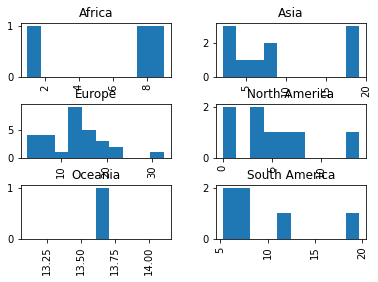

In [ ]:
#Lets look at the suicide rate distribution per continent
by_continent['suicide_rate'].hist(by=by_continent['Continent'])
#none of these look normally distributed. Lets compare them with a box plot

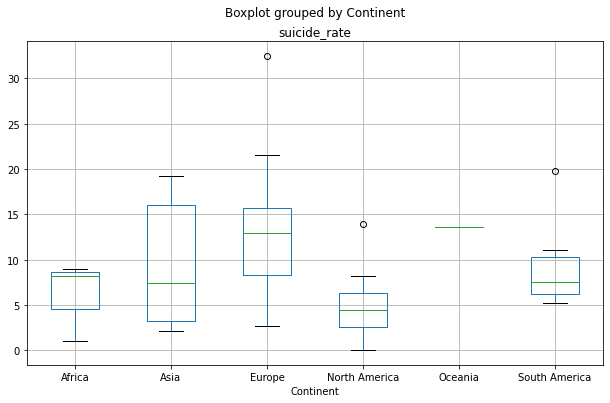

In [ ]:
by_continent.boxplot('suicide_rate', by='Continent', figsize = (10, 6))

#What are the outliers in the box plots for Europe, North America, and South America?

In [ ]:
#lets split them up for easier analysis
Africa = by_continent[by_continent['Continent'] == 'Africa']
Asia = by_continent[by_continent['Continent'] == 'Asia']
Europe = by_continent[by_continent['Continent'] == 'Europe']
North_America = by_continent[by_continent['Continent'] == 'North America']
Oceania = by_continent[by_continent['Continent'] == 'Oceania']
South_America = by_continent[by_continent['Continent'] == 'South America']

Europe.sort_values('suicide_rate', ascending=False).head()

,country,suicides_no,population,suicide_rate,GDP,GDP_per_capita,Continent
30,Lithuania,896,2753926,32.535370,41508609233,15072.521641,Europe
46,Slovenia,422,1954632,21.589742,43072415017,22036.073807,Europe
29,Latvia,387,1875522,20.634255,26972863394,14381.523327,Europe
22,Hungary,1868,9389519,19.894523,122879042002,13086.830327,Europe
54,Ukraine,7574,40345446,18.772875,91030959455,2256.288342,Europe


In [ ]:
North_America.sort_values('suicide_rate', ascending=False).head(20)

,country,suicides_no,population,suicide_rate,GDP,GDP_per_capita,Continent
11,Cuba,1511,10832068,13.949322,87132800000,8043.967228,North America
6,Belize,26,319835,8.129192,1778567600,5560.891084,North America
36,Nicaragua,315,5476483,5.751867,12611087031,2302.771145,North America
34,Mexico,6234,114357884,5.451308,1169622672463,10227.739720,North America
21,Guatemala,494,14258397,3.464625,63767597194,4472.283749,North America
38,Panama,110,3583382,3.069726,54315722500,15157.670184,North America
0,Antigua and Barbuda,1,91889,1.088270,1364863037,14853.388730,North America
20,Grenada,0,96892,0.000000,997007926,10289.889010,North America


In [ ]:
South_America.sort_values('suicide_rate', ascending=False).head(20)

,country,suicides_no,population,suicide_rate,GDP,GDP_per_capita,Continent
56,Uruguay,630,3190795,19.744296,53274304222,16696.247870,South America
8,Chile,1838,16565725,11.095198,243999477738,14729.175918,South America
1,Argentina,3073,39699624,7.740627,594749285413,14981.232200,South America
14,Ecuador,1073,14534024,7.382677,99290381000,6831.582293,South America
7,Brazil,11163,191087085,5.841839,1802214373741,9431.377185,South America
9,Colombia,2332,44490427,5.241577,291519591533,6552.411635,South America


In [ ]:

print(stats.describe(Africa['suicide_rate']))
print(stats.describe(Asia['suicide_rate']))
print(stats.describe(Europe['suicide_rate']))
print(stats.describe(North_America['suicide_rate']))
print(stats.describe(Oceania['suicide_rate']))
print(stats.describe(South_America['suicide_rate']))


DescribeResult(nobs=3, minmax=(0.9712364888309818, 9.005514145584527), mean=6.040371771932109, variance=19.45749398871014, skewness=-0.6769089181845636, kurtosis=-1.5000000000000002)
DescribeResult(nobs=10, minmax=(2.131316236355959, 19.1831764904573), mean=9.204210518755188, variance=48.059902187917075, skewness=0.5538103434123195, kurtosis=-1.3408317892242634)
DescribeResult(nobs=29, minmax=(2.647267679902409, 32.5353695052082), mean=13.284360347236916, variance=38.43077002261284, skewness=0.8147449776341085, kurtosis=1.466041875891558)
DescribeResult(nobs=8, minmax=(0.0, 13.949321588453838), mean=5.113038478911241, variance=19.561989634942076, skewness=0.8927999738795107, kurtosis=0.050558190603269715)
DescribeResult(nobs=1, minmax=(13.610131117224505, 13.610131117224505), mean=13.610131117224505, variance=nan, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=6, minmax=(5.241577025098006, 19.74429570060126), mean=9.507702335464979, variance=29.316930532731153, skewness=1.29000754238

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#Oceania only has one observation for 2015 so we will not consider this 
#our analysis. The rest have very few observations.
#according to the description stats, they are close enough to normal
#Lets do a shapiro wilks test to verify normality.

print(stats.shapiro(Africa['suicide_rate']))
print(stats.shapiro(Asia['suicide_rate']))
print(stats.shapiro(Europe['suicide_rate']))
print(stats.shapiro(North_America['suicide_rate']))
print(stats.shapiro(South_America['suicide_rate']))

#The results show that some may be considered normally distributed but not
#all of them. With such small sample sizes I think it safe to assume that
#they are not normally distributed 

(0.8293670415878296, 0.1867223083972931)
(0.8259387016296387, 0.02989352121949196)
(0.9482415914535522, 0.16474410891532898)
(0.9241180419921875, 0.46415975689888)
(0.8003075122833252, 0.059149663895368576)


In [ ]:
#These are independent samples so we will use a Kruskal-Wallis test
#to determine if there is a meaningful difference between any of the continents
stats.kruskal(
    Africa['suicide_rate'],
    Asia['suicide_rate'],
    Europe['suicide_rate'],
    North_America['suicide_rate'],
    South_America['suicide_rate']
)

KruskalResult(statistic=13.198693933108615, pvalue=0.010344661924483746)

# Results of Hypothesis 4:
Based on the H-value and the fact that the p-value is under .05, we can reject the null and conclude that suicide rates are significantly different on different continents.

# Discussion and Recommendations:
The results of the hypotheses were quite interesting. While suicides have gone up world wide, the rate at which they are occuring have not changed significantly. We know that younger people as well as males are more likely to commit suicide but the data does not lend to reasons why. My hypothesis that GDP or GDP per capita indicated that this was a significant cause or indication that a person was more likely to commit suicide based on the socio-economic status of the country in which they lived. I also hypothesized that suicide rates would be significantly different based on continent because life is significantly different not just from country to country but also from continent to continent. This was also found to not be an indicator of suicide rate.

For recommendations, further investigation is needed, possibly comparing the 5 countries with the highest rates and the 5 countries with the lowest rates to see if there is a societal reason behind these differences.